# Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition

## by Aurelien Geron

### Notes by Melis Tekant

## Chapter 3: Classification

In [22]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_openml
from sklearn. linear_model import SGDClassifier

In this chapter, classification methods will be discussed, using the MNIST dataset. 

In [5]:
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
# Separating data and target
X,y = mnist['data'],mnist['target']

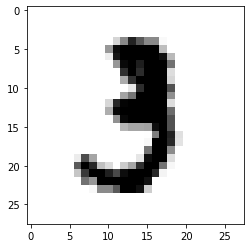

In [15]:
# Looking at a random image
digit = X[10]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image,cmap=mpl.cm.binary);

In [19]:
# Looking at what the label is for this image
y.astype('int')[10]

3

In [23]:
# Training and test sets
y = y.astype('int')
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [37]:
# Building a binary classifier for the number 5

# Setting results to True/False for 5/not-5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#Stochastic Gradient Descent Classifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train,y_train_5)
sgd.predict([digit])

array([False])

array([ True])

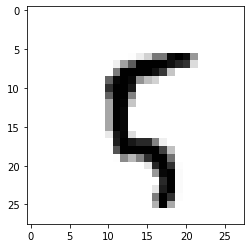

In [38]:
plt.imshow(X[100].reshape(28,28),cmap=mpl.cm.binary)
sgd.predict([X[100]])

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd,X_train,y_train_5, cv=3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [40]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd,X_train,y_train_5,cv=3)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Since the percentage of correct idenfitications may be misleading, especially in the case that there are a lot more in one class than the other, the validation score metric does not give an accurate sense of the goodness of fit of the model. We can use the confusion matrix to get more info (shown above), but if we need more compact, single value results, we turn to the following: 

1. Precision, or the accuracy of positive predictions: TP/(TP+FP)
2. Recall = Sensitivity = True positive rate = TP/(TP+FN)

where TP = true positive, FP = false positive, and FN = false negative.

Combining precision and recall scores, we can define $F_1$ score, the harmonic mean of precision and recall scores. 

$$F_1 = \frac{2}{\frac{1}{precision} +\frac{1}{recall}} $$

Increasing/decreasing precision reduces/increases recall: precision/recall tradeoff. The ideal point for these values is dependent on the desired application.

In [44]:
from sklearn.metrics import precision_score, recall_score,f1_score

print('Precision Score: ', str(precision_score(y_train_5,y_train_pred)))
print('Recall Score: ', str(recall_score(y_train_5,y_train_pred)))
print('F1 Score: ', str(f1_score(y_train_5,y_train_pred)))

Precision Score:  0.8370879772350012
Recall Score:  0.6511713705958311
F1 Score:  0.7325171197343846


In [46]:
# Now let's visualize the precision-recall trade-off:

y_scores = cross_val_predict(sgd,X_train,y_train_5, cv=3, method = 'decision_function')

In [67]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

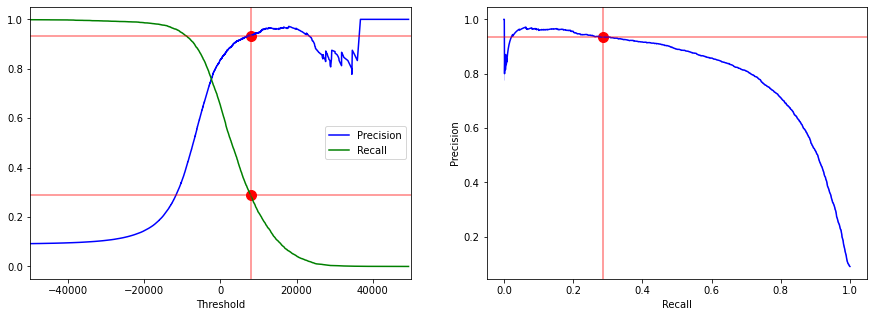

In [79]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x = thresholds,y = precisions[:-1],color='b',label="Precision")
sns.lineplot(x = thresholds, y = recalls[:-1], color= 'g', label = "Recall")
plt.legend()
plt.xlim([-50000,50000])
plt.xlabel('Threshold')

#Let's choose 8000 as a threshold value
thres = 8000
thresh2 = (thresholds - thres)**2
minval = min(thresh2)
closest_idx = np.where(thresh2 == minval)

plt.axvline(thres,color = 'r', alpha = 0.5);
plt.axhline(precisions[closest_idx],color ='r', alpha = 0.5)
plt.axhline(recalls[closest_idx], color = 'r', alpha = 0.5)
plt.scatter(thres,precisions[closest_idx],color = 'r', s= 100)
plt.scatter(thres,recalls[closest_idx],color = 'r', s= 100)

plt.subplot(1,2,2)
sns.lineplot(x = recalls, y = precisions, color = 'b')
plt.axhline(precisions[closest_idx],color = 'r', alpha = 0.5)
plt.axvline(recalls[closest_idx], color = 'r', alpha =0.5)
plt.scatter(recalls[closest_idx],precisions[closest_idx],color = 'r', s=100)
plt.xlabel('Recall')
plt.ylabel('Precision');